In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import math
from sklearn import preprocessing
warnings.filterwarnings("ignore")

In [2]:
item_cat=pd.read_csv("./competitive-data-science-predict-future-sales/item_categories.csv")
items=pd.read_csv("./competitive-data-science-predict-future-sales/items.csv")
submission=pd.read_csv("./competitive-data-science-predict-future-sales/sample_submission.csv")
shops=pd.read_csv("./competitive-data-science-predict-future-sales/shops.csv")
train=pd.read_csv("./competitive-data-science-predict-future-sales/sales_train.csv")
test=pd.read_csv("./competitive-data-science-predict-future-sales/test.csv")

In [3]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [4]:
train.date=train.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [5]:
print(train)
print(train.info())

              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0       2013-01-02               0       59    22154      999.00           1.0
1       2013-01-03               0       25     2552      899.00           1.0
2       2013-01-05               0       25     2552      899.00          -1.0
3       2013-01-06               0       25     2554     1709.05           1.0
4       2013-01-15               0       25     2555     1099.00           1.0
...            ...             ...      ...      ...         ...           ...
2935844 2015-10-10              33       25     7409      299.00           1.0
2935845 2015-10-09              33       25     7460      299.00           1.0
2935846 2015-10-14              33       25     7459      349.00           1.0
2935847 2015-10-22              33       25     7440      299.00           1.0
2935848 2015-10-03              33       25     7460      299.00           1.0

[2935849 rows x 6 columns]
<class 'pandas.core.fram

## Dealing with Outliers

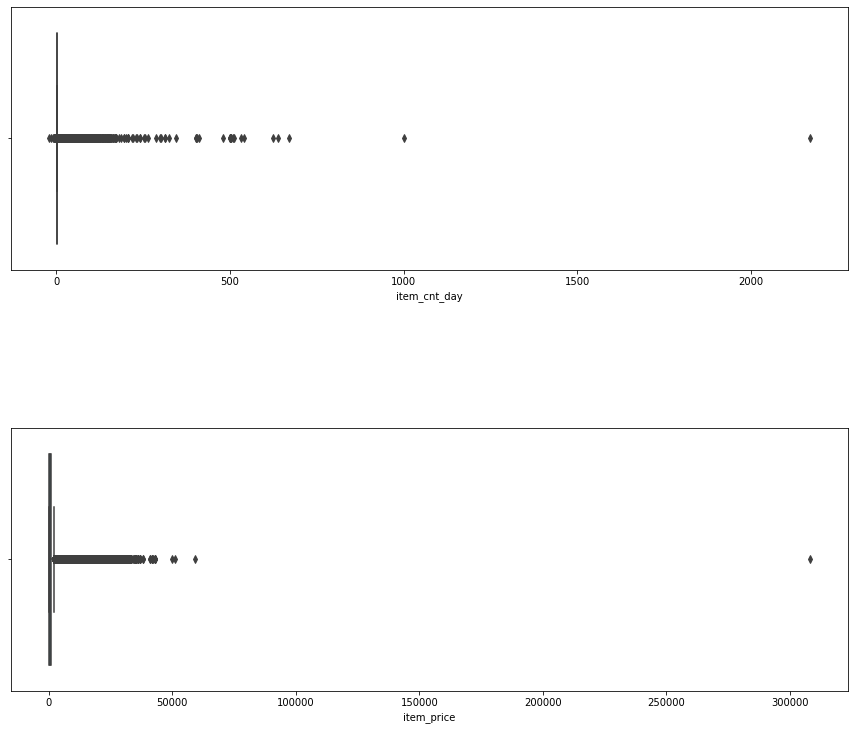

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,20))
sns.boxplot(x=train.item_cnt_day, data=train, ax=ax1)
sns.boxplot(x=train.item_price, data=train, ax=ax2)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

In [7]:
train[train.item_cnt_day > 999].item_cnt_day

2326930    1000.0
2909818    2169.0
Name: item_cnt_day, dtype: float64

In [8]:
train[train.index == 2909818]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2909818,2015-10-28,33,12,11373,0.908714,2169.0


In [9]:
train[train.index == 2326930] 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,2015-01-15,24,12,20949,4.0,1000.0


In [10]:
shops[shops.shop_id == 12]

,shop_name,shop_id
12,Интернет-магазин ЧС,12


In [11]:
train[train.item_id == 11373]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
58323,2013-01-08,0,12,11373,1000.00,1.0
58324,2013-01-31,0,12,11373,97.80,5.0
176790,2013-02-01,1,12,11373,229.00,1.0
176791,2013-02-04,1,12,11373,130.00,1.0
302468,2013-03-29,2,12,11373,139.50,2.0
...,...,...,...,...,...,...
2909829,2015-10-07,33,12,11373,855.00,2.0
2909830,2015-10-06,33,12,11373,208.80,5.0
2909831,2015-10-05,33,12,11373,140.75,16.0
2909832,2015-10-02,33,12,11373,648.50,2.0


In [12]:
train[train.item_id == 20949]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352379,2013-04-30,3,22,20949,5.000000,12.0
352399,2013-04-29,3,22,20949,4.923077,13.0
352400,2013-04-28,3,22,20949,5.000000,4.0
352401,2013-04-27,3,22,20949,5.000000,4.0
352455,2013-04-24,3,22,20949,5.000000,2.0
...,...,...,...,...,...,...
2930644,2015-10-02,33,22,20949,5.000000,1.0
2930645,2015-10-03,33,22,20949,5.000000,2.0
2930646,2015-10-04,33,22,20949,5.000000,3.0
2930647,2015-10-05,33,22,20949,5.000000,2.0


In [13]:
train[train.item_price > 300000].item_price

1163158    307980.0
Name: item_price, dtype: float64

In [14]:
train[train.index == 1163158]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [15]:
train[train.item_id == 6066] #it is the only transaction

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1163158,2013-12-13,11,12,6066,307980.0,1.0


In [16]:
train = train[(train.item_price < 100000 )& (train.item_cnt_day < 1000)]
print(train.shape[0])
#before it was 2935849

2935846


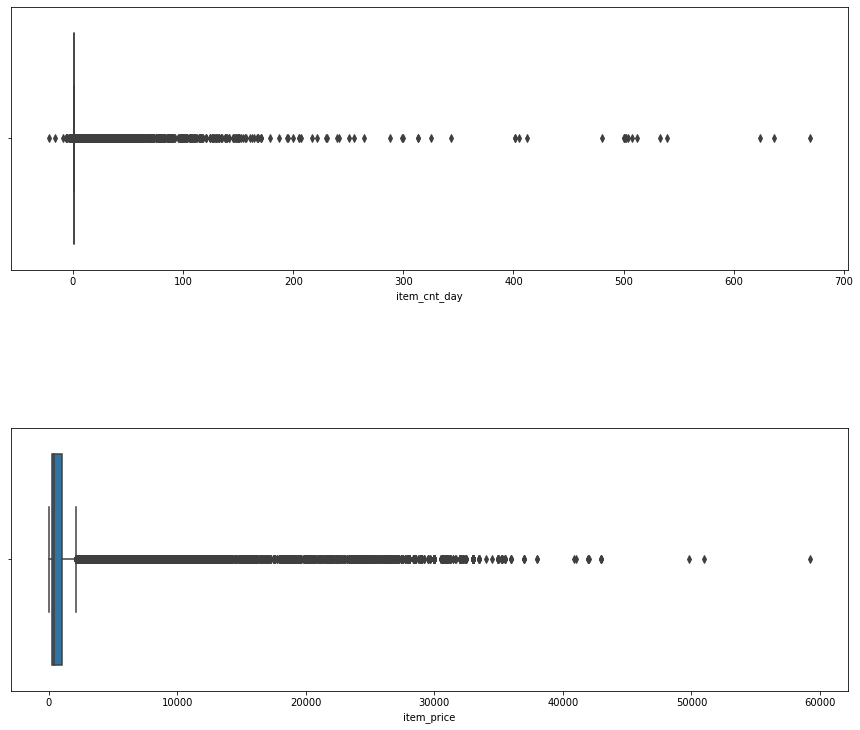

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,20))
sns.boxplot(x=train.item_cnt_day, data=train, ax=ax1)
sns.boxplot(x=train.item_price, data=train, ax=ax2)

plt.subplots_adjust(hspace = 0.6, top = 0.6)
plt.show()

In [18]:
train[train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [19]:
train[train['item_id'] == 2973]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
352,2013-01-15,0,25,2973,2499.00,13.0
353,2013-01-16,0,25,2973,2499.00,5.0
354,2013-01-17,0,25,2973,2499.00,3.0
355,2013-01-18,0,25,2973,2499.00,2.0
356,2013-01-19,0,25,2973,2499.00,3.0
...,...,...,...,...,...,...
1765321,2014-06-22,17,57,2973,1249.50,1.0
1782298,2014-06-09,17,47,2973,1249.00,1.0
1851765,2014-07-04,18,26,2973,1249.50,1.0
1923837,2014-08-06,19,6,2973,1249.50,1.0


In [20]:
itemprice_correction = train[(train['shop_id'] == 32) & (train['item_id'] == 2973) & (train['date_block_num'] == 4) & (train['item_price'] > 0)].item_price.median()
train.loc[train['item_price'] < 0, 'item_price'] = itemprice_correction

In [21]:
itemprice_correction

1874.0

## Data Analysis

In [22]:
train[train.item_cnt_day < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [23]:
train[(train.shop_id != 25) & (train.item_cnt_day < 0)]
#It is a returned item so we will keep the negatives of item_cnt_day

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2411,2013-01-14,0,24,1628,3899.0,-1.0
3216,2013-01-08,0,24,20948,899.0,-1.0
3386,2013-01-20,0,24,11756,169.0,-1.0
3447,2013-01-20,0,24,9547,149.0,-1.0
3492,2013-01-12,0,24,10097,699.0,-1.0
...,...,...,...,...,...,...
2926839,2015-10-20,33,31,10780,349.0,-1.0
2928586,2015-10-22,33,31,1523,799.0,-1.0
2929224,2015-10-08,33,21,16146,1799.0,-1.0
2930269,2015-10-06,33,24,7039,299.0,-1.0


In [24]:
#train.loc[train.item_cnt_day < 1, "item_cnt_day"] = 0

In [25]:
print(train.shape[0])

2935846


In [26]:
print(train['date'].min().date())
print(train['date'].max().date())

2013-01-01
2015-10-31


In [27]:
test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [28]:
test['shop_id'].unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22, 24, 21, 15, 16,
       18, 14, 19, 42, 50, 49, 53, 52, 47, 48, 57, 58, 59, 55, 56, 36, 37,
       35, 38, 34, 46, 41, 44, 39, 45])

In [29]:
train[train['shop_id'].isin(test['shop_id'].unique())]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [30]:
# only shops that exist in test data
after_train = train[train['shop_id'].isin(test['shop_id'].unique())]
# only items that exist in test data
after_train = after_train[after_train['item_id'].isin(test['item_id'].unique())]

In [31]:
print(train.shape)
print(after_train.shape)

(2935846, 6)
(1224437, 6)


In [32]:
after_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
10,2013-01-03,0,25,2574,399.0,2.0
11,2013-01-05,0,25,2574,399.0,1.0
12,2013-01-07,0,25,2574,399.0,1.0
13,2013-01-08,0,25,2574,399.0,2.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.0,1.0
2935845,2015-10-09,33,25,7460,299.0,1.0
2935846,2015-10-14,33,25,7459,349.0,1.0
2935847,2015-10-22,33,25,7440,299.0,1.0


In [33]:
train_monthly = after_train.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)

In [34]:
train_monthly = train_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})

In [35]:
train_monthly.describe()

date_block_num        shop_id        item_id     item_price  \
                                                              sum   
count  600158.000000  600158.000000  600158.000000  600158.000000   
mean       20.158757      32.061690   10014.863349    2102.758990   
std         9.139361      16.889783    6192.898704    7012.475031   
min         0.000000       2.000000      30.000000       0.500000   
25%        13.000000      19.000000    4395.000000     299.000000   
50%        22.000000      31.000000    9089.000000     747.000000   
75%        28.000000      47.000000   15374.000000    1849.000000   
max        33.000000      59.000000   22167.000000  515573.589744   

                       item_cnt_day                                
                mean            sum           mean          count  
count  600158.000000  600158.000000  600158.000000  600158.000000  
mean      911.493269       2.690295       1.089950       2.040191  
std      1565.816633      10.833826       1.197588       2.322393  
min         0.500000      -4.000000      -2.000000       1.000000  
25%       299.000000       1.000000       1.000000       1.000000  
50%       477.000000       1.000000       1.000000       1.000000  
75%      1099.000000       2.000000       1.000000       2.000000  
max     42990.000000    1305.000000     500.000000      31.000000

In [36]:
train_monthly

date_block_num shop_id item_id item_price         item_cnt_day       \
                                             sum    mean          sum mean   
0                   0       2      33      499.0   499.0          1.0  1.0   
1                   0       2     482     3300.0  3300.0          1.0  1.0   
2                   0       2     491      600.0   600.0          1.0  1.0   
3                   0       2     839     3300.0  3300.0          1.0  1.0   
4                   0       2    1007     1347.0   449.0          3.0  1.0   
...               ...     ...     ...        ...     ...          ...  ...   
600153             33      59   22087      357.0   119.0          6.0  2.0   
600154             33      59   22088      238.0   119.0          2.0  1.0   
600155             33      59   22091      179.0   179.0          1.0  1.0   
600156             33      59   22100      629.0   629.0          1.0  1.0   
600157             33      59   22102     1250.0  1250.0          1.0  1.0   

              
       count  
0          1  
1          1  
2          1  
3          1  
4          3  
...      ...  
600153     3  
600154     2  
600155     1  
600156     1  
600157     1  

[600158 rows x 8 columns]

In [37]:
items['item_category_id'].unique()

array([40, 76, 55, 19, 30, 23, 37, 41, 57, 43, 78, 54, 49, 44, 45, 77, 73,
       31, 75, 58, 56, 38, 67, 59, 60, 74, 21, 28, 20, 24, 29, 70, 22, 32,
       62, 25, 72,  4, 63, 27, 18, 26, 64, 15, 68,  0,  2,  5,  1,  3,  6,
       35, 65, 14, 13, 10, 11, 12, 48, 71, 69,  7, 33, 34, 16, 66, 39, 52,
       46, 42, 61,  8, 80,  9, 17, 36, 47, 82, 81, 50, 51, 79, 53, 83])

In [38]:
# Rename features.
train_monthly.columns = ['date_block_num', 'shop_id', 'item_id', 'item_price', 'mean_item_price', 'item_cnt', 'mean_item_cnt', 'item_transactions']

In [39]:
train_monthly

,date_block_num,shop_id,item_id,item_price,mean_item_price,item_cnt,mean_item_cnt,item_transactions
0,0,2,33,499.0,499.0,1.0,1.0,1
1,0,2,482,3300.0,3300.0,1.0,1.0,1
2,0,2,491,600.0,600.0,1.0,1.0,1
3,0,2,839,3300.0,3300.0,1.0,1.0,1
4,0,2,1007,1347.0,449.0,3.0,1.0,3
...,...,...,...,...,...,...,...,...
600153,33,59,22087,357.0,119.0,6.0,2.0,3
600154,33,59,22088,238.0,119.0,2.0,1.0,2
600155,33,59,22091,179.0,179.0,1.0,1.0,1
600156,33,59,22100,629.0,629.0,1.0,1.0,1


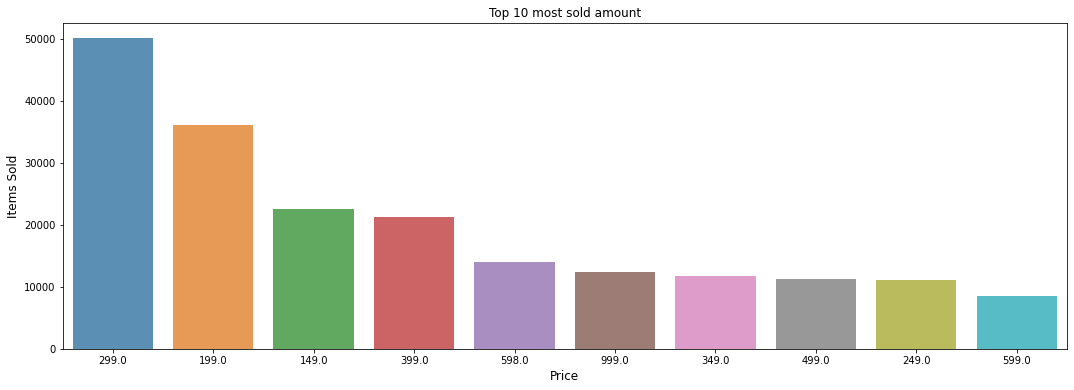

In [40]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(train_monthly["item_price"].value_counts().index[:10], train_monthly["item_price"].value_counts().values[:10], order=train_monthly["item_price"].value_counts().index[:10], alpha=0.8)
plt.title("Top 10 most sold amount")
plt.ylabel('Items Sold', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.show()

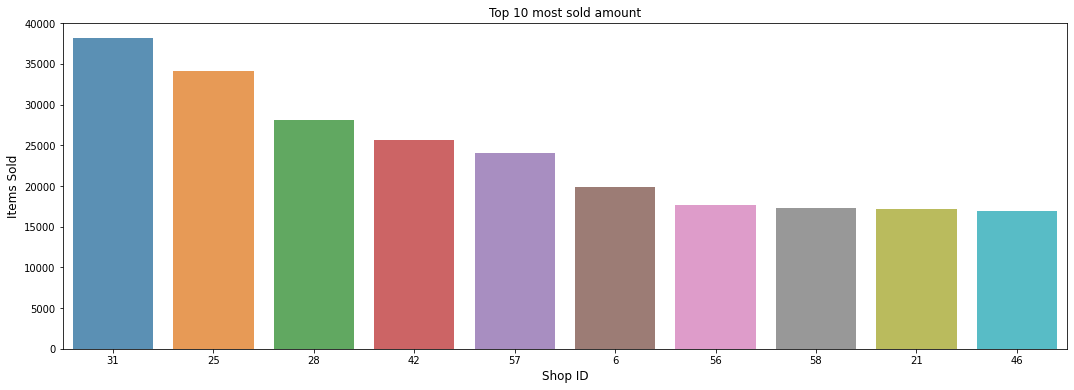

In [41]:
plt.figure(figsize=(18, 6))
ax = sns.barplot(train_monthly["shop_id"].value_counts().index[:10], train_monthly["shop_id"].value_counts().values[:10], order=train_monthly["shop_id"].value_counts().index[:10], alpha=0.8)
plt.title("Top 10 most sold amount")
plt.ylabel('Items Sold', fontsize=12)
plt.xlabel('Shop ID', fontsize=12)
plt.show()

Text(0.5, 1.0, 'Total sales yearly')

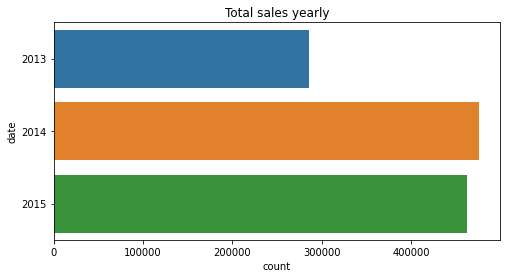

In [42]:
plt.figure(figsize=(8,4))
sns.countplot(y=after_train["date"].dt.year, data=after_train)
plt.title("Total sales yearly")

In [43]:
train_monthly.isna().sum()

date_block_num       0
shop_id              0
item_id              0
item_price           0
mean_item_price      0
item_cnt             0
mean_item_cnt        0
item_transactions    0
dtype: int64

## Time Series

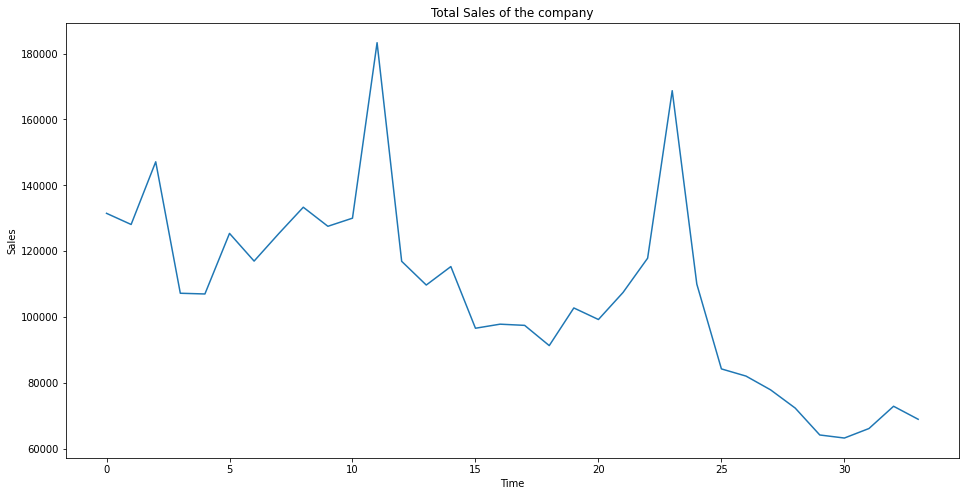

In [44]:
ts=train.groupby(["date_block_num"])["item_cnt_day"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

In [45]:
rolmean = ts.rolling(window=12).mean()
rolstd = ts.rolling(window=12).std()
print(rolmean, rolstd) #11 values are NaN because data is monthly so first 11 month is NaN

date_block_num
0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11    130227.666667
12    129012.666667
13    127479.083333
14    124825.333333
15    123939.166667
16    123174.166667
17    120844.833333
18    118704.333333
19    116823.500000
20    113979.833333
21    112303.250000
22    111289.583333
23    110074.083333
24    109496.750000
25    107372.666667
26    104599.083333
27    103038.333333
28    100913.750000
29     98137.500000
30     95796.416667
31     92742.916667
32     90545.833333
33     87334.583333
Name: item_cnt_day, dtype: float64 date_block_num
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
5              NaN
6              NaN
7              NaN
8              NaN
9              NaN
10             NaN
11    20057.972762
12    20413.715988
13    21

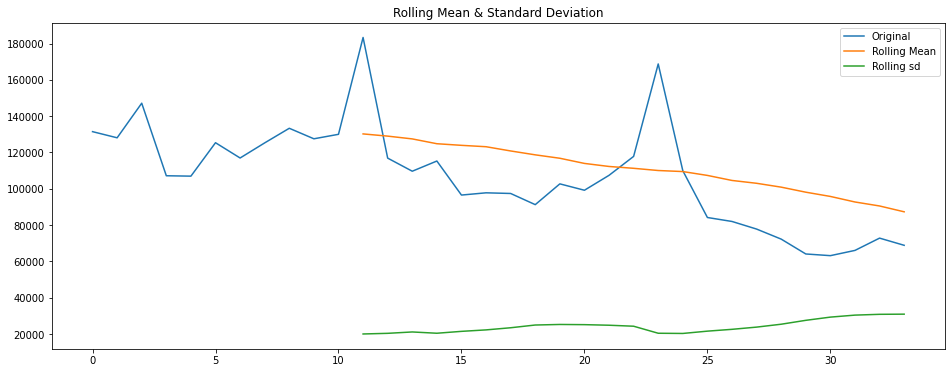

In [46]:
plt.figure(figsize=(16,6))
original = plt.plot(ts, label='Original');
mean = plt.plot(rolmean,label='Rolling Mean');
std = plt.plot(rolstd,label='Rolling sd');
#plt.figure(figsize=(16,6))
plt.legend(loc='best');
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)


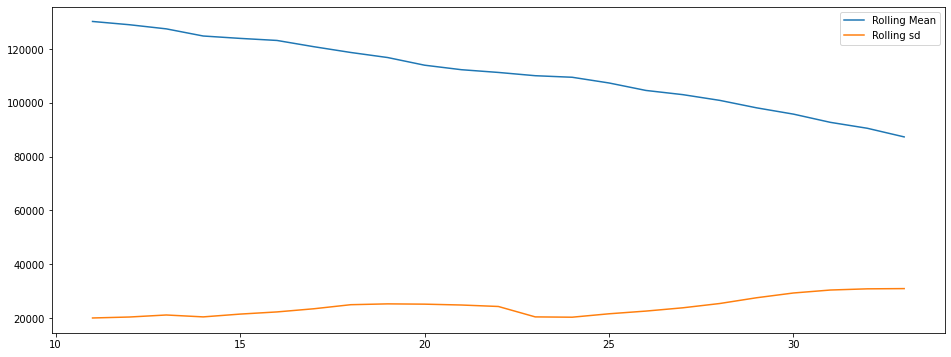

In [47]:
plt.figure(figsize=(16,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean');
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling sd');
plt.legend();

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

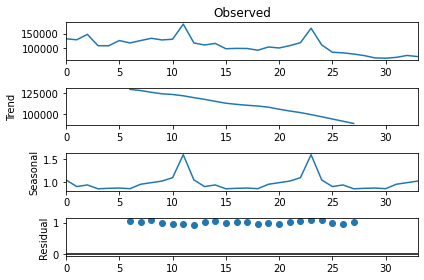

In [49]:
res = seasonal_decompose(ts.values, freq=12, model="multiplicative")
fig = res.plot()

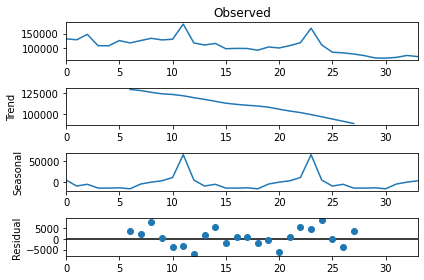

In [50]:
res = seasonal_decompose(ts.values, freq=12, model="additive")
fig = res.plot()

## Tests to Check Stationary

In [51]:
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                 -2.375595
p-value                         0.148743
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


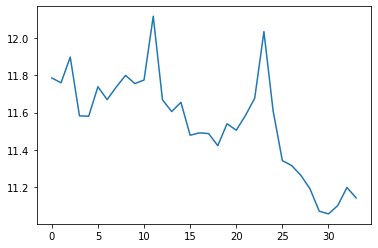

In [52]:
ts_log = np.log(ts)
plt.plot(ts_log)


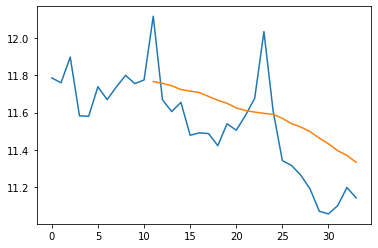

In [53]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage)

In [68]:
scale = ts_log - movingAverage
scale.head(12)

date_block_num
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11    0.351828
Name: item_cnt_day, dtype: float64

In [69]:
scale.dropna(inplace = True)
scale.head(12)

date_block_num
11    0.351828
12   -0.088415
13   -0.139169
14   -0.068965
15   -0.237646
16   -0.217470
17   -0.200149
18   -0.244679
19   -0.110042
20   -0.120205
21   -0.026352
22    0.074439
Name: item_cnt_day, dtype: float64

In [70]:
def test_stationarityAll(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    plt.figure(figsize=(16,6))
    original = plt.plot(timeseries, label='Original');
    mean = plt.plot(movingAverage, label='Rolling Mean');
    std = plt.plot(movingSTD, label='Rolling sd');
    #plt.figure(figsize=(16,6))
    plt.legend(loc='best');
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

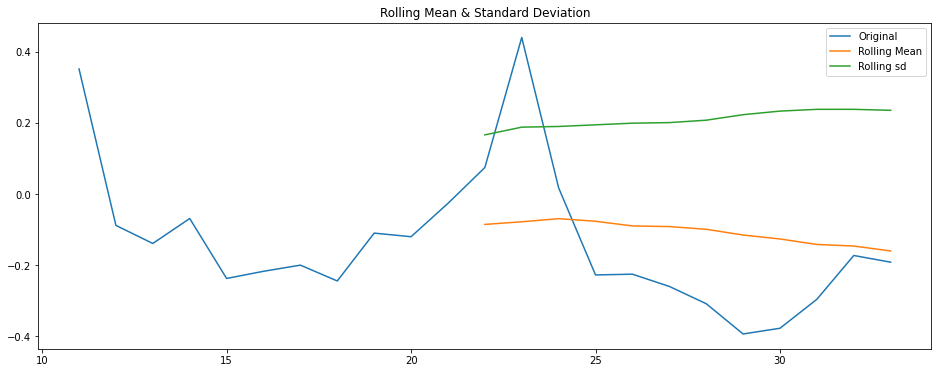

Results of Dickey-Fuller Test:
Test Statistic                 -3.214431
p-value                         0.019164
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [71]:
test_stationarityAll(scale)

#### Now after the transformations, our p-value for the DF test is well within 5 %. Hence we can assume Stationarity of the series

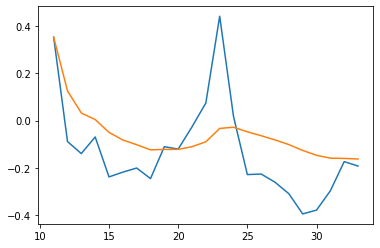

In [72]:
weightedAverage = scale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(scale)
plt.plot(weightedAverage)

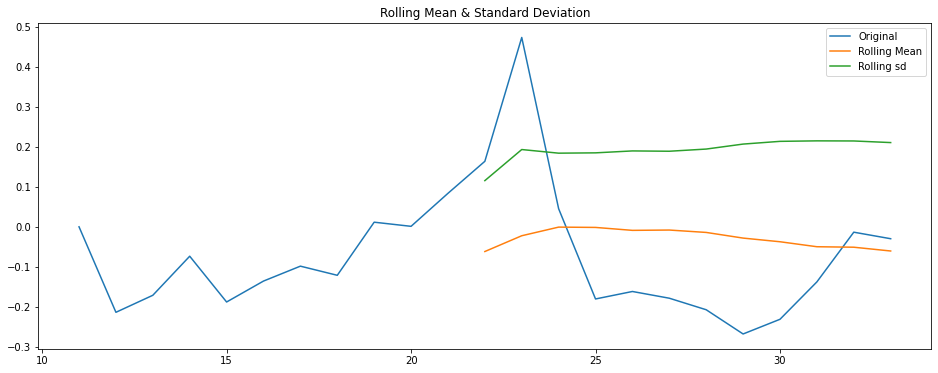

Results of Dickey-Fuller Test:
Test Statistic                 -2.265251
p-value                         0.183420
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [73]:
weightedAverageScale = scale - weightedAverage
test_stationarityAll(weightedAverageScale)

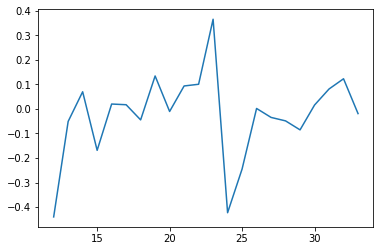

In [74]:
datasetLogShifting = scale - scale.shift()
plt.plot(datasetLogShifting)

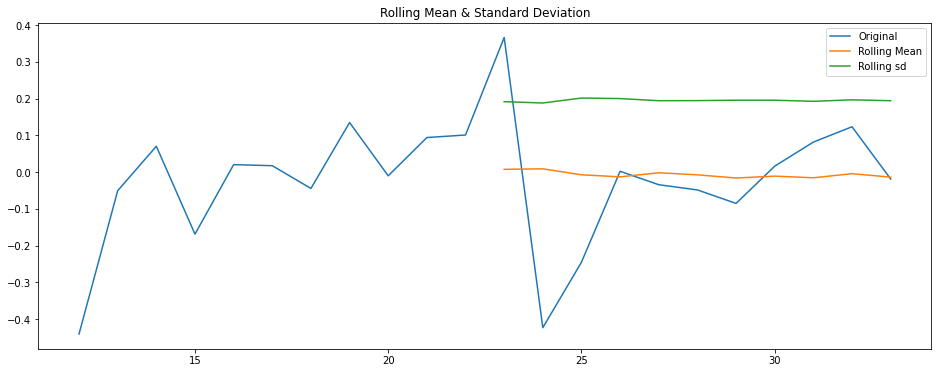

Results of Dickey-Fuller Test:
Test Statistic                 -5.110253
p-value                         0.000013
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [75]:
datasetLogShifting.dropna(inplace=True)
test_stationarityAll(datasetLogShifting)


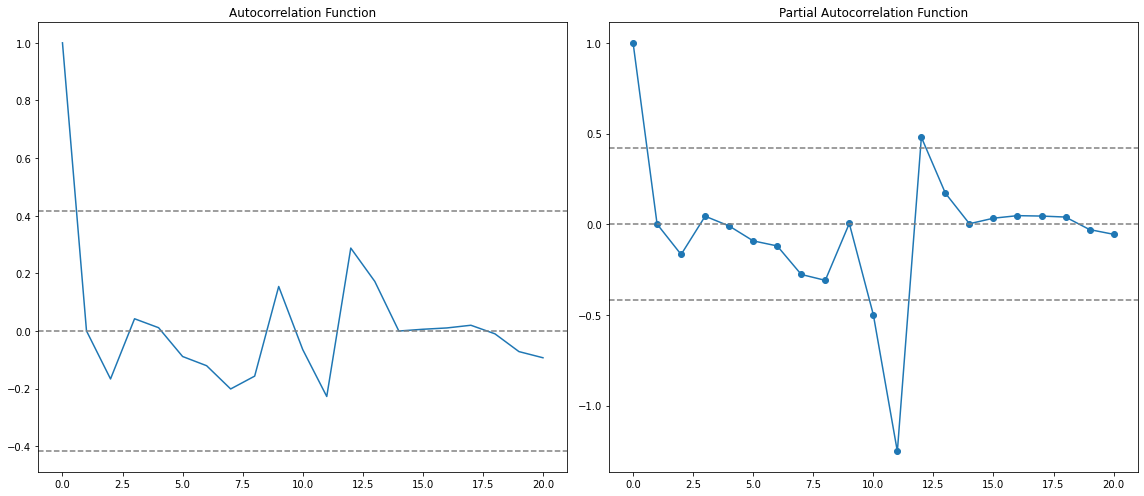

In [76]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogShifting, nlags=20)
lag_pacf = pacf(datasetLogShifting, nlags=20, method='ols')

plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')


#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

## ARIMA Model

AR Model


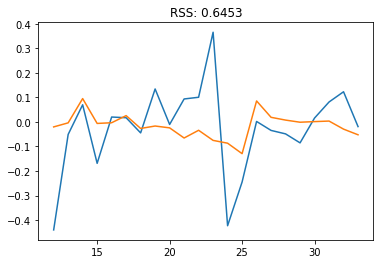

In [97]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(scale, order=(0, 1, 2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogShifting)
plt.plot(results_AR.fittedvalues)
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogShifting)**2))
print("AR Model")

AR Model


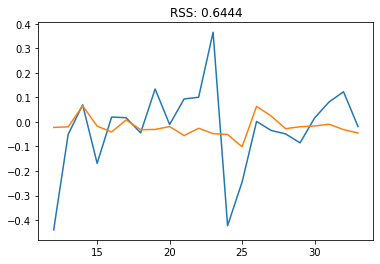

In [99]:
#MA Model
model = ARIMA(scale, order=(2, 1, 0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogShifting)
plt.plot(results_MA.fittedvalues)
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogShifting)**2))
print("AR Model")

ARIMA Model


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.item_cnt_day   No. Observations:                   22
Model:                 ARIMA(2, 1, 2)   Log Likelihood                   8.930
Method:                       css-mle   S.D. of innovations              0.154
Date:                Sun, 09 Aug 2020   AIC                             -5.860
Time:                        00:24:11   BIC                              0.686
Sample:                             1   HQIC                            -4.318
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0164      0.011     -1.539      0.124      -0.037       0.004
ar.L1.D.item_cnt_day     0.3118      0.873      0.357      0.721      -1.399       2.022
ar.L2.D.item_cnt_day     0.0908      0.642      0.141      0.888      -1.168       1.349
ma.L1.D.item_cnt_day    -0.5394      0.817     -0.660      0.509      -2.141       1.062
ma.L2.D.item_cnt_day    -0.4606      0.810     -0.569      0.570      -2.048       1.127
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0195           +0.0000j            2.0195            0.0000
AR.2           -5.4544           +0.0000j            5.4544            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.1711           +0.0000j            2.1711            0.5000
-----------------------------------------------------------------------------
"""

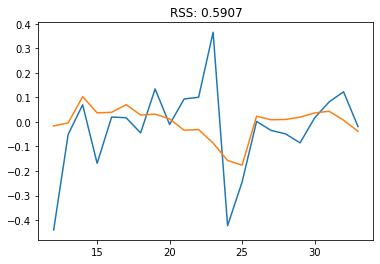

In [114]:
#ARIMA Model
model = ARIMA(scale, order=(2, 1, 2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogShifting)
plt.plot(results_ARIMA.fittedvalues)
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogShifting)**2))
print("ARIMA Model")
results_ARIMA.summary()

In [103]:
ARIMA_Prediction = pd.Series(results_ARIMA.fittedvalues, copy=True)
ARIMA_Prediction.head()

date_block_num
12   -0.016366
13   -0.003636
14    0.103290
15    0.037136
16    0.039546
dtype: float64

In [104]:
ARIMA_Prediction_cumsum = ARIMA_Prediction.cumsum()
ARIMA_Prediction_cumsum.head()

date_block_num
12   -0.016366
13   -0.020002
14    0.083288
15    0.120423
16    0.159969
dtype: float64

In [105]:
ARIMA_Prediction_log = pd.Series(scale, index=scale.index)
ARIMA_Prediction_log = ARIMA_Prediction_log.add(ARIMA_Prediction_cumsum, fill_value=0)
ARIMA_Prediction_log.head()

date_block_num
11    0.351828
12   -0.104781
13   -0.159172
14    0.014323
15   -0.117223
dtype: float64

In [106]:
prediction_ARIMA = np.exp(ARIMA_Prediction_log)
prediction_ARIMA.head()

date_block_num
11    1.421664
12    0.900521
13    0.852850
14    1.014426
15    0.889387
dtype: float64

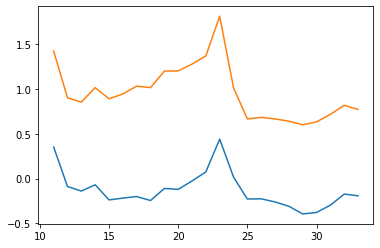

In [107]:
plt.plot(scale) #blue
plt.plot(prediction_ARIMA) #yellow

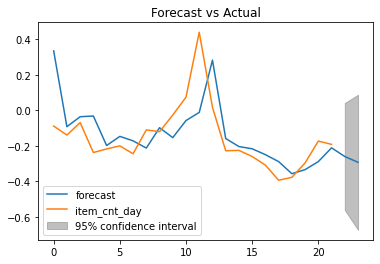

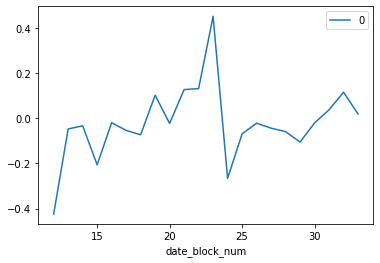

In [115]:
results_ARIMA.plot_predict(1, 24)
plt.title('Forecast vs Actual')
pd.DataFrame(results_ARIMA.resid).plot()
forcast = results_ARIMA.forecast(steps=6) #predicted for the next 6 months
pred_y = forcast[0].tolist()
pred = pd.DataFrame(pred_y)

In [113]:
scale

date_block_num
11    0.351828
12   -0.088415
13   -0.139169
14   -0.068965
15   -0.237646
16   -0.217470
17   -0.200149
18   -0.244679
19   -0.110042
20   -0.120205
21   -0.026352
22    0.074439
23    0.440425
24    0.017285
25   -0.227722
26   -0.225618
27   -0.260050
28   -0.308611
29   -0.393832
30   -0.377743
31   -0.296227
32   -0.173029
33   -0.191843
Name: item_cnt_day, dtype: float64

In [112]:
pred #for the next 6 months

,0
0,-0.260105
1,-0.301833
2,-0.330819
3,-0.353423
4,-0.372881
5,-0.390777


# LSTM Approach

In [109]:
dataset = train_monthly.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')

In [110]:
dataset.reset_index(inplace = True)

In [111]:
dataset.head()

shop_id item_id item_cnt                       ...              \
date_block_num                        0  1  2  3  4  5  6  7  ... 24 25 26 27   
0                    2      30        0  0  1  0  0  1  0  0  ...  0  0  0  0   
1                    2      31        0  4  1  1  0  0  0  0  ...  0  0  0  0   
2                    2      32        0  0  0  0  0  0  0  0  ...  0  0  1  0   
3                    2      33        1  0  0  0  0  0  0  0  ...  0  1  0  1   
4                    2      53        0  0  0  0  0  0  0  0  ...  0  1  0  0   

                                  
date_block_num 28 29 30 31 32 33  
0               0  0  0  0  0  0  
1               0  0  0  0  0  1  
2               0  0  0  1  0  0  
3               1  0  1  0  1  0  
4               0  0  0  0  0  0  

[5 rows x 36 columns]

In [112]:
dataset = pd.merge(test,dataset,on = ['item_id','shop_id'],how = 'left')

In [113]:
dataset.fillna(0,inplace = True)

In [114]:
dataset

,ID,shop_id,item_id,"(item_cnt, 0)","(item_cnt, 1)","(item_cnt, 2)","(item_cnt, 3)","(item_cnt, 4)","(item_cnt, 5)","(item_cnt, 6)",...,"(item_cnt, 24)","(item_cnt, 25)","(item_cnt, 26)","(item_cnt, 27)","(item_cnt, 28)","(item_cnt, 29)","(item_cnt, 30)","(item_cnt, 31)","(item_cnt, 32)","(item_cnt, 33)"
0,0,5,5037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,1,5,5320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5,5233,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,3,5,5232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,5,5268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
214196,214196,45,16188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214197,214197,45,15757,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214198,214198,45,19648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
dataset.drop(['shop_id','item_id','ID'],inplace = True, axis = 1)

In [116]:
dataset.head()

,"(item_cnt, 0)","(item_cnt, 1)","(item_cnt, 2)","(item_cnt, 3)","(item_cnt, 4)","(item_cnt, 5)","(item_cnt, 6)","(item_cnt, 7)","(item_cnt, 8)","(item_cnt, 9)",...,"(item_cnt, 24)","(item_cnt, 25)","(item_cnt, 26)","(item_cnt, 27)","(item_cnt, 28)","(item_cnt, 29)","(item_cnt, 30)","(item_cnt, 31)","(item_cnt, 32)","(item_cnt, 33)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,2.0,0.0,1.0,3.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# X we will keep all columns execpt the last one 
X_train = np.expand_dims(dataset.values[:,:-1],axis = 2)
# the last column is our label
y_train = dataset.values[:,-1:]

# for test we keep all the columns execpt the first one
X_test = np.expand_dims(dataset.values[:,1:],axis = 2)

In [118]:
print(X_train.shape,y_train.shape,X_test.shape)

(214200, 33, 1) (214200, 1) (214200, 33, 1)


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

In [121]:
epochs = 40
batch = 256
lr = 0.0003
adam = optimizers.Adam(lr)

In [133]:
model_m = Sequential()
model_m.add(LSTM(units = 64,input_shape = (33,1)))
model_m.add(Dropout(0.4))
model_m.add(Dense(1))

model_m.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
model_m.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
unified_lstm_8 (UnifiedLSTM) (None, 64)                16896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [134]:
history = model_m.fit(X_train, y_train, batch_size=4096, epochs=10)

Epoch 1/10
214200/214200 [==============================] - 20s 94us/sample - loss: 6.9681 - mean_squared_error: 6.9681
Epoch 2/10
214200/214200 [==============================] - 20s 94us/sample - loss: 6.7211 - mean_squared_error: 6.7211
Epoch 3/10
214200/214200 [==============================] - 22s 101us/sample - loss: 6.5204 - mean_squared_error: 6.5204
Epoch 4/10
214200/214200 [==============================] - 20s 91us/sample - loss: 6.4338 - mean_squared_error: 6.4338
Epoch 5/10
214200/214200 [==============================] - 19s 91us/sample - loss: 6.3894 - mean_squared_error: 6.3894
Epoch 6/10
214200/214200 [==============================] - 20s 92us/sample - loss: 6.2932 - mean_squared_error: 6.2932
Epoch 7/10
214200/214200 [==============================] - 20s 95us/sample - loss: 6.2813 - mean_squared_error: 6.2813
Epoch 8/10
214200/214200 [==============================] - 20s 95us/sample - loss: 6.1868 - mean_squared_error: 6.1868
Epoch 9/10
214200/214200 [=============

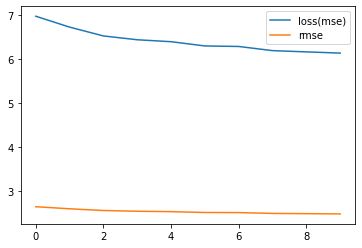

In [135]:
plt.plot(history.history['loss'], label= 'loss(mse)')
plt.plot(np.sqrt(history.history['mean_squared_error']), label= 'rmse')
plt.legend(loc=1)

In [137]:
LSTM_prediction = model_m.predict(X_test)

In [139]:
LSTM_prediction = LSTM_prediction.clip(0, 20)

In [140]:
result = pd.DataFrame({'ID':test['ID'],'item_cnt_month':LSTM_prediction.ravel()})

In [142]:
result

,ID,item_cnt_month
0,0,0.472608
1,1,0.123997
2,2,0.829937
3,3,0.172496
4,4,0.123997
...,...,...
214195,214195,0.369591
214196,214196,0.123997
214197,214197,0.106419
214198,214198,0.123997


In [143]:
result.to_csv('result.csv',index = False)